### Analiza głównych składowych

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
means = [2.13, -99, 0.11, -1.01] # cztery zmienne z innymi średnimi

# Macierz kowariancji
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]])
print('Covariance matrix')
print(cov_matrix)

n=1000  # Liczba wierszy
df = np.random.multivariate_normal(means, cov_matrix, n)
print('Dataframe:')
print(df)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]
Dataframe:
[[ 2.37312617e+00 -9.90221241e+01  9.02307737e-01  5.46387979e-01]
 [ 2.92535314e+00 -9.83697283e+01  1.02840498e+00  5.04118705e-02]
 [ 2.57525334e+00 -9.81645029e+01  6.94864386e-01  2.16629406e-01]
 ...
 [-1.29715664e+00 -1.02346185e+02  5.20409713e-01 -4.94302750e-02]
 [-9.67276715e-01 -1.02175438e+02  2.64975184e-01  2.29160712e-02]
 [ 1.23608289e+00 -9.97260788e+01 -4.97134428e-01 -1.68547610e+00]]


##### Dodanie koloru aby reprezentował czwarty wymiar

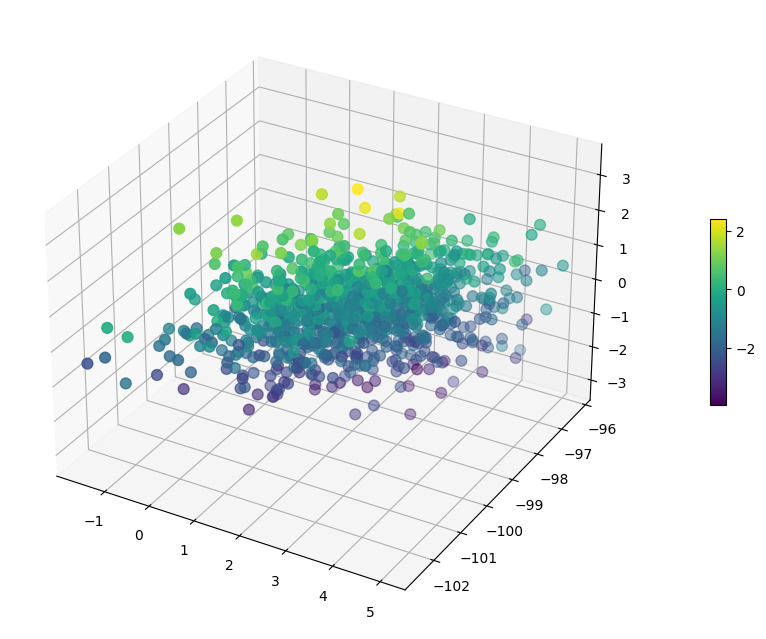

In [3]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=df[:,0], ys=df[:,1], zs=df[:,2], c=df[:,3], s=60)
cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02, ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)
plt.show()

### Standaryzacja

##### Przesuwamy średnią do 0, Przesuwamy odchylenie standardowe do 1. Po standaryzacji, wszystkie obserwacje większe od średniej są dodatnie, a które były mniejsze od średniej stały się wartościami ujemnymi.

In [4]:
print('Przed standaryzacją')
print('Średnia:\n',df.mean(axis=0))
print('Odchylenie standardowe:\n',df.std(axis=0))

# Standaryzacja
df_standardizated = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

print('\nPo standaryzacji')
print('Średnia:\n',df_standardizated.mean(axis=0))
print('Odchylenie standardowe:\n',df_standardizated.std(axis=0))

Przed standaryzacją
Średnia:
 [ 2.06867250e+00 -9.90540934e+01  9.64887070e-02 -1.01856481e+00]
Odchylenie standardowe:
 [1.02253853 1.02625597 1.00074369 0.96333509]

Po standaryzacji
Średnia:
 [ 1.85629290e-16 -1.35461642e-13 -2.76445533e-17 -8.96727137e-16]
Odchylenie standardowe:
 [1. 1. 1. 1.]


### Macierz kowariancji

##### Dlatego dodatnia kowariancja oznacza, że wartości obu cech wspólnie rosną lub maleją. Natomiast jeśli kowariancja jest ujemna to gdy wartości jednej z cech rosną to wartości drugiej cechy maleją.

In [5]:
covariance_matrix = np.cov(df_standardizated.T)
covariance_matrix

array([[ 1.001001  ,  0.96516018, -0.0444833 , -0.06239756],
       [ 0.96516018,  1.001001  , -0.04219307, -0.05711012],
       [-0.0444833 , -0.04219307,  1.001001  ,  0.88115925],
       [-0.06239756, -0.05711012,  0.88115925,  1.001001  ]])

### Wykonanie macierzy kowariancji

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Wartości własne:\n',eigenvalues,'\n\nWektory własne:\n',eigenvectors)

Wartości własne:
 [2.03557924 1.81289641 0.03580619 0.11972217] 

Wektory własne:
 [[-0.58763678 -0.39311885  0.70717775 -0.00634161]
 [-0.58613478 -0.39561508 -0.70680663  0.01895023]
 [ 0.38935509 -0.59072852 -0.01118288 -0.70662392]
 [ 0.39941413 -0.58308326  0.01410519  0.70730708]]


In [7]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)

[0.508, 0.453, 0.03, 0.009]


### Transformacja cech

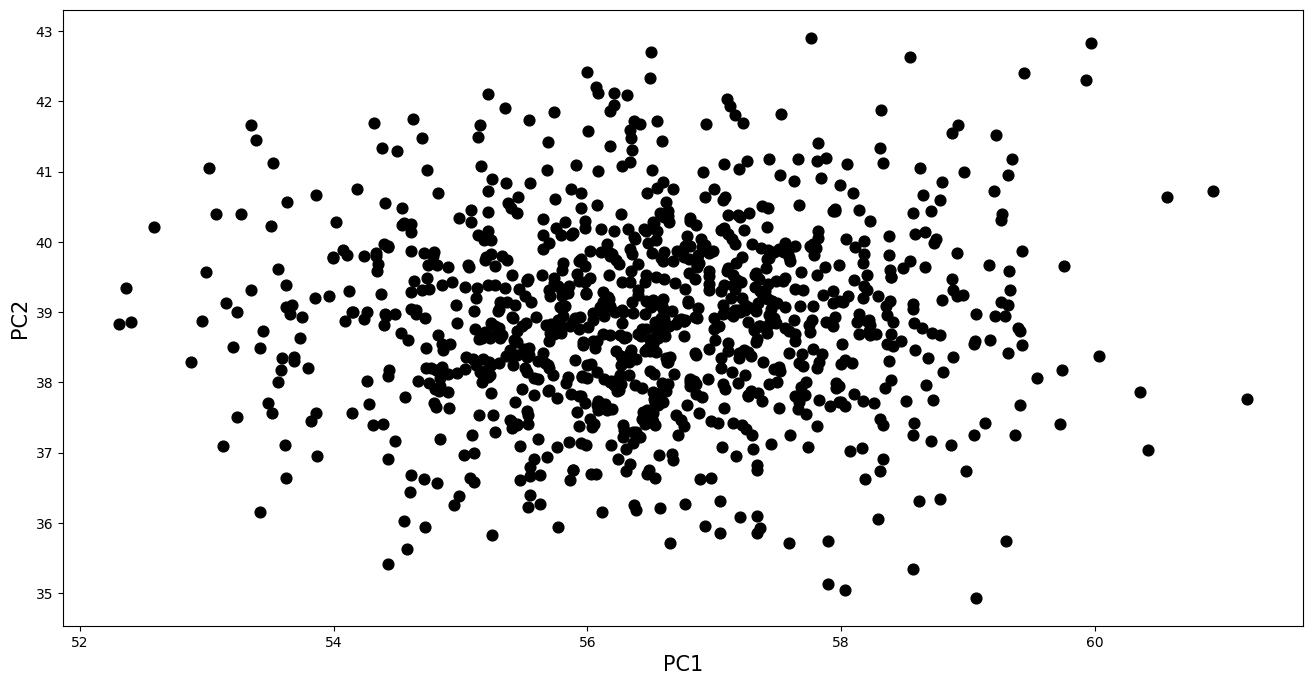

In [8]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)
w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = df.dot(w.T[0])
pc2 = df.dot(w.T[1])
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c='black', s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()

# PCA - zastosowanie

In [9]:
import pandas as pd
import seaborn as sns

In [10]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Wizualizacja

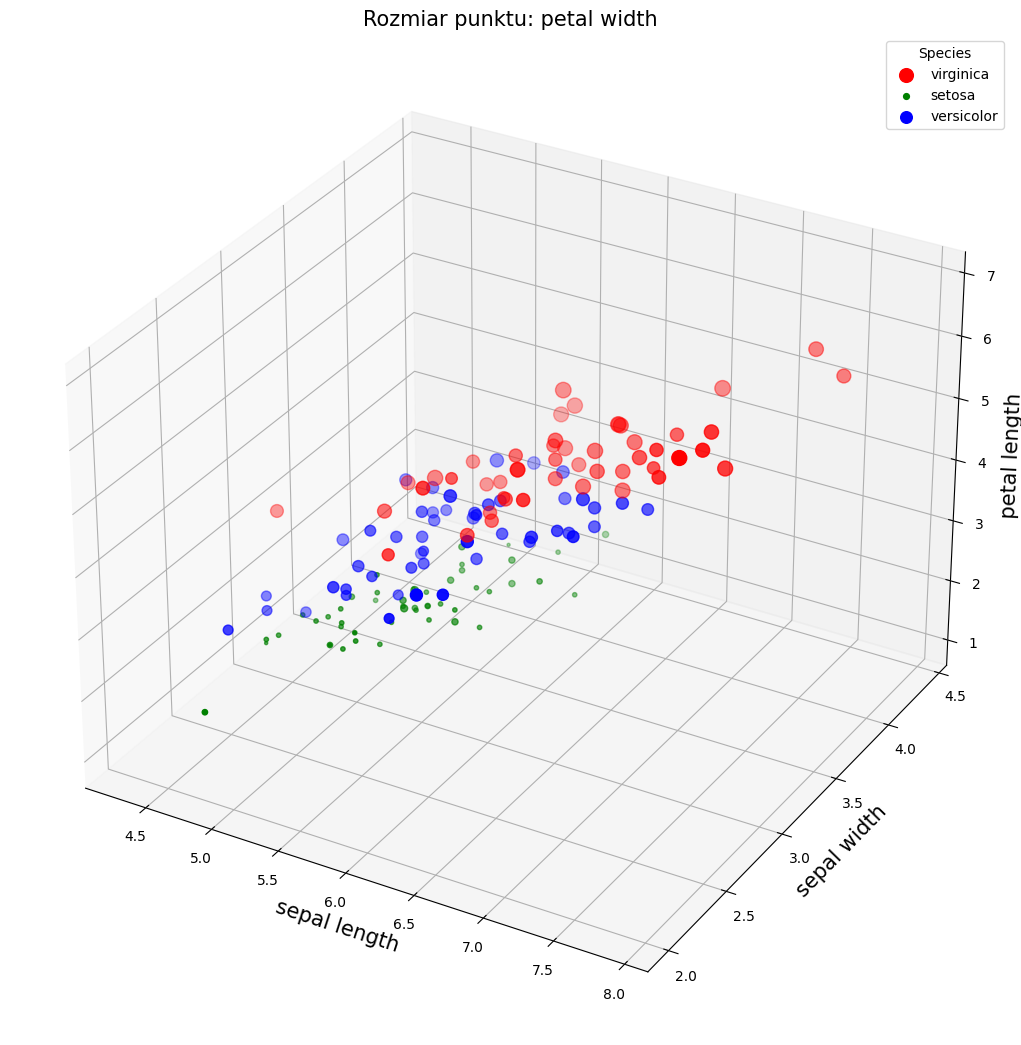

In [13]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=iris.loc[iris['species']=='virginica', 'sepal_length'],
                 ys=iris.loc[iris['species']=='virginica','sepal_width'],
                 zs=iris.loc[iris['species']=='virginica', 'petal_length'],
                 s=iris.loc[iris['species']=='virginica','petal_width']*50,
                 c='red', label='virginica')
img = ax.scatter(xs=iris.loc[iris['species']=='setosa', 'sepal_length'],
                 ys=iris.loc[iris['species']=='setosa','sepal_width'],
                 zs=iris.loc[iris['species']=='setosa', 'petal_length'],
                 s=iris.loc[iris['species']=='setosa','petal_width']*50,
                 c='green', label='setosa')
img = ax.scatter(xs=iris.loc[iris['species']=='versicolor', 'sepal_length'],
                 ys=iris.loc[iris['species']=='versicolor','sepal_width'],
                 zs=iris.loc[iris['species']=='versicolor', 'petal_length'],
                 s=iris.loc[iris['species']=='versicolor','petal_width']*50,
                 c='blue', label='versicolor')
ax.set_xlabel(xlabel='sepal length', size=15)
ax.set_ylabel(ylabel='sepal width', size=15)
ax.set_zlabel(zlabel='petal length', size=15)
ax.set_title('Rozmiar punktu: petal width', size=15)
plt.legend(title='Species')
plt.show()

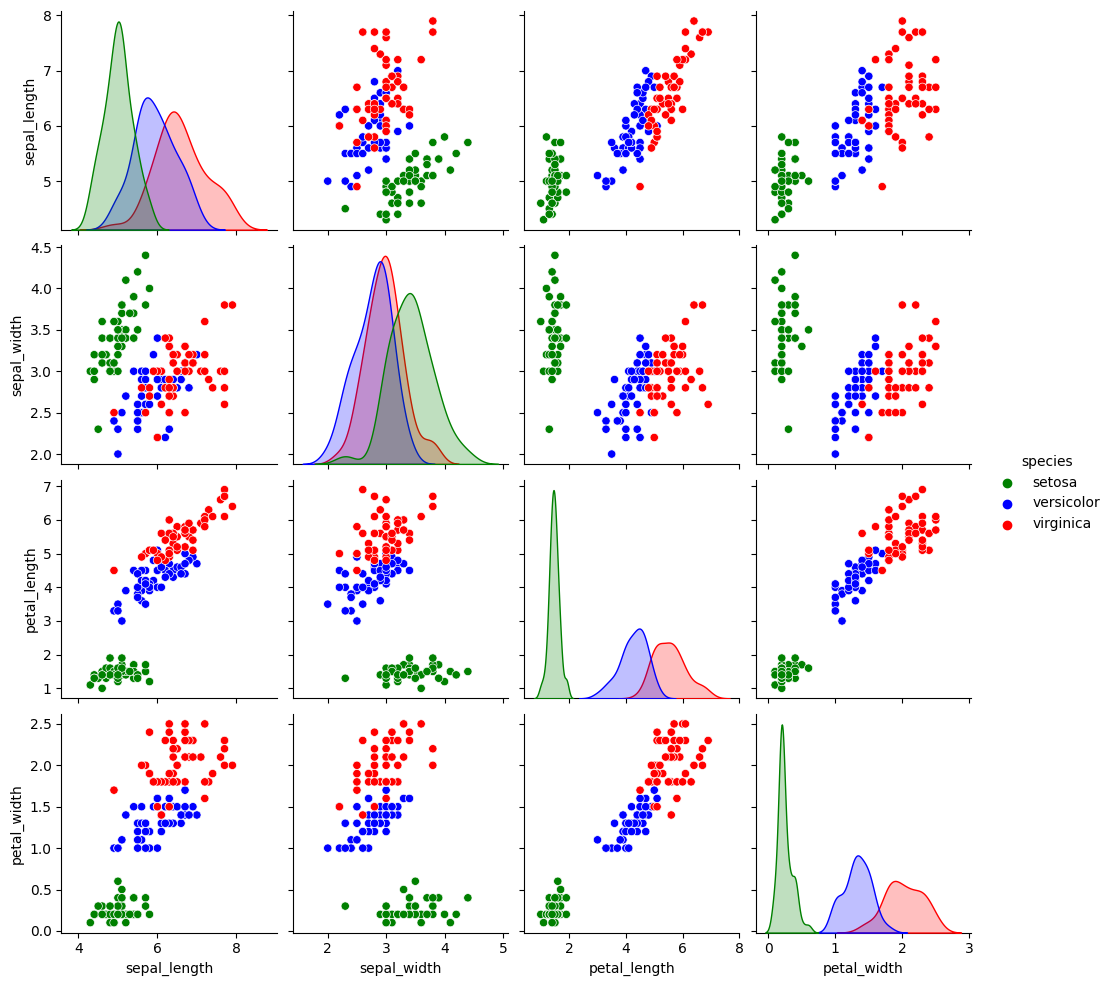

In [14]:
sns.pairplot(iris,
             hue='species',
             palette={'virginica': 'red', 'setosa': 'green', 'versicolor': 'blue'})
plt.show()

##### Stosujemy korelację Pearsona

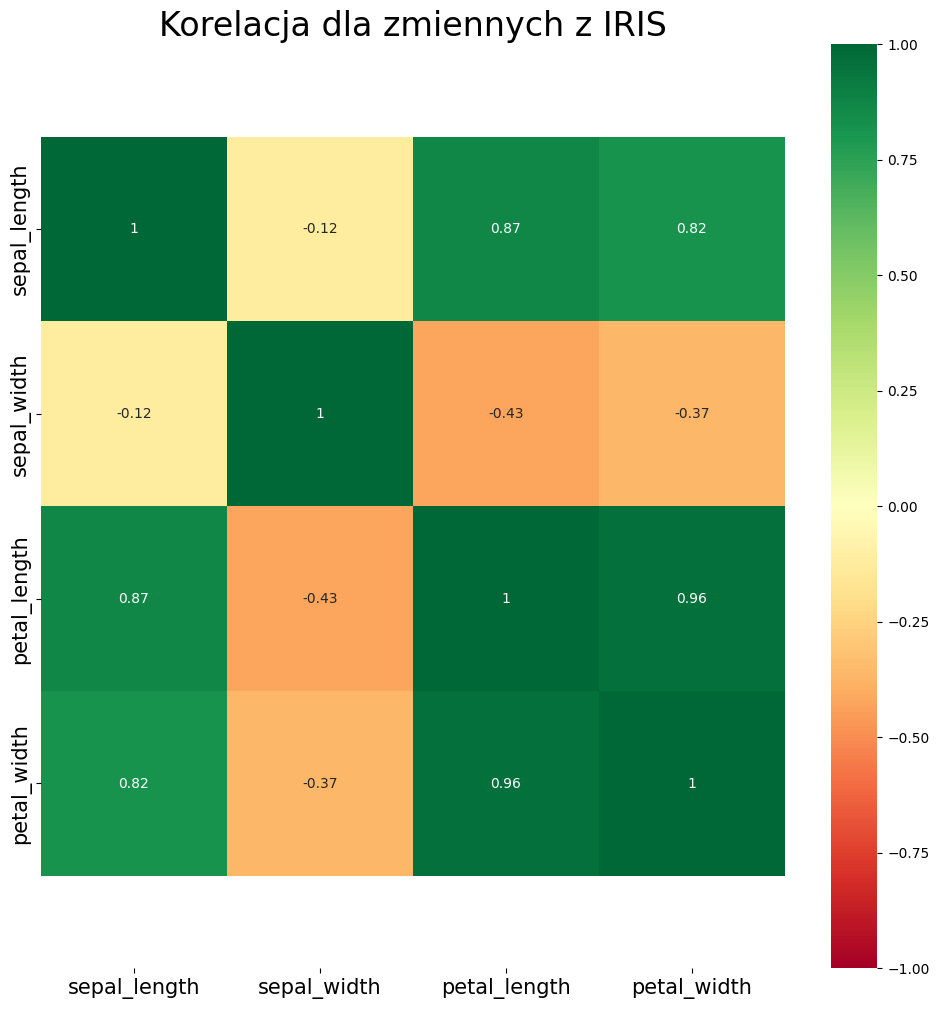

In [15]:
numeric_iris = iris.iloc[:, :-1]  # Wybieramy tylko kolumny numeryczne

plt.figure(figsize=(12, 12))
ax = sns.heatmap(numeric_iris.corr(),
                 xticklabels=numeric_iris.corr().columns,
                 yticklabels=numeric_iris.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z IRIS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Zastosujemy PCA. 50% danych poświęcimy na zbiór testowy ponieważ cały zbiór jest niewielki

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
X = iris.drop('species', axis=1).copy()
y = iris['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_iris = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_iris.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'species'},
                  inplace=True)
train_iris[['PC1', 'PC2','PC3','PC4']] = train_iris[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_iris.corr()

ValueError: could not convert string to float: 'setosa'